Validación cruzada RMSE: 3.3852222682085644
RMSE: 2.7852969805966037
R^2: 0.6930893105393338


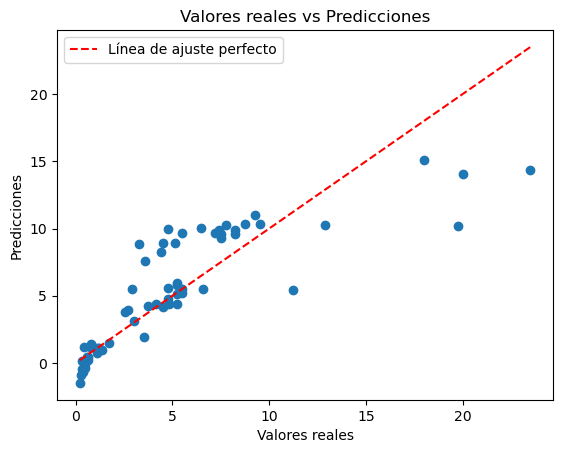

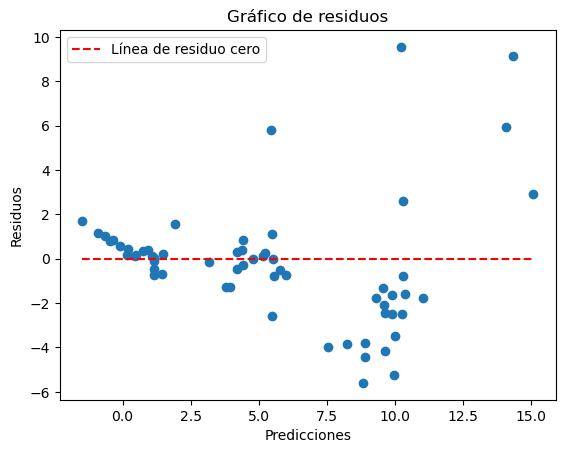

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Cargar los datos desde las rutas especificadas
data1 = pd.read_csv('C:\\python\\RegresionLineal\\CAR DETAILS FROM CAR DEKHO.csv')
data2 = pd.read_csv('C:\\python\\RegresionLineal\\Car details v3.csv')
data3 = pd.read_csv('C:\\python\\RegresionLineal\\car details v4.csv')
data4 = pd.read_csv('C:\\python\\RegresionLineal\\car data.csv')

# Asegurarse de que los nombres de las columnas son consistentes entre los conjuntos de datos

# Combinar los datos en un solo DataFrame
data = pd.concat([data1, data2, data3, data4], ignore_index=True)

# Limpiar y preprocesar los datos
# Asegurarse de que no haya filas con valores faltantes en la columna objetivo 'Selling_Price'
data = data[data['Selling_Price'].notna()]

# Definir características numéricas y categóricas
numeric_features = ['Year', 'Kms_Driven']  # Eliminar 'engine', 'max_power' y 'seats'
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
features = numeric_features + categorical_features
target = 'Selling_Price'

# Preprocesar las características numéricas y categóricas por separado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear el pipeline de regresión lineal
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data[features]
y = data[target].astype(float)  # Convertir la variable objetivo a flotante
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Realizar validación cruzada
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse = -cv_scores.mean()

print(f'Validación cruzada RMSE: {cv_rmse}')

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Evaluar el modelo
y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

# Gráfico de valores reales vs predicciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Línea de ajuste perfecto')
plt.legend()
plt.show()

# Gráfico de residuos
residuos = y_test - y_pred
plt.scatter(y_pred, residuos)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), linestyles='dashed', colors='red', label='Línea de residuo cero')
plt.legend()
plt.show()